In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow
import matplotlib.pyplot as plt
import numpy as np

print(tensorflow.__version__)

2.0.0


## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import math

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.callbacks import ModelCheckpoint

## Read the Data

In [3]:
import shutil # copy, move file
import os # miscellaneous operation system interfaces
import pathlib
import random
random.seed(101)

DATA_RAW_FOLDER = "./data/raw"
DATA_RAW_IMAGE_FOLDER = "./data/raw/aglined_faces" 
DATA_TRAIN_FOLDER = "./data/train"
DATA_TEST_FOLDER = "./data/test"

SAMPLE_TRAIN_FOLDER = './data/samples/train'
SAMPLE_TEST_FOLDER = './data/samples/test'

In [4]:
df1 = pd.read_csv(DATA_RAW_FOLDER + '/image sets/train.txt', sep='\s', names =['image_name','gender'])
df2 = pd.read_csv(DATA_RAW_FOLDER + '/image sets/val.txt', sep='\s', names =['image_name','gender'])

df = pd.concat([df1,df2], ignore_index = True)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [5]:
df['age'] = df['image_name'].str.split('A').str[1].str[:2]
df

,image_name,gender,age
0,00000A02.jpg,0,02
1,00002A02.jpg,0,02
2,00004A02.jpg,0,02
3,00006A02.jpg,0,02
4,00008A02.jpg,0,02
...,...,...,...
13317,13312A80.jpg,1,80
13318,13314A80.jpg,1,80
13319,13316A80.jpg,1,80
13320,13318A80.jpg,1,80


In [10]:
## Create a train and test folders
img_folder = pathlib.Path(DATA_RAW_IMAGE_FOLDER)

all_image_paths = [item for item in img_folder.glob('*/') if item.is_file()]
random.shuffle(all_image_paths)

num_img = len(all_image_paths)
test_ratio = 0.2

for ind, path in enumerate(all_image_paths):
    label = df[df['image_name'] == path.name]['age'].values
    labels.append(label)
    dst = DATA_TRAIN_FOLDER
    
    if ind < int(num_img * test_ratio):
        dst = DATA_TEST_FOLDER
    
    if int(label) in range(0,16):
        shutil.copy(str(path), os.path.join(dst,'0_15'))
    if int(label) in range(16,26):
        shutil.copy(str(path), os.path.join(dst,'16_25'))
    if int(label) in range(26,36):
        shutil.copy(str(path), os.path.join(dst,'26_35'))
    if int(label) in range (36,46):
        shutil.copy(str(path), os.path.join(dst,'36_45'))
    elif int(label) >= 46:
        shutil.copy(str(path), os.path.join(dst,'46_'))

In [11]:
!ls -1q ./data/train/*/* | wc -l
!ls -1q ./data/test/*/* | wc -l

10658
2664


In [ ]:
# # Take samples from orginal data

# train_data = pathlib.Path(DATA_TRAIN_FOLDER)
# age_labels = ['0_2', '3_6', '7_12', '13_20', '21_32', '33_43', '44_59', '60_']
# for label in age_labels:
#     os.makedirs(SAMPLE_TRAIN_FOLDER + '/' + label)
#     os.makedirs(SAMPLE_TEST_FOLDER + '/' + label)
    
# n_sample = 1600
# test_size = 0.2

# train0_2 = []
# train3_6 = []
# train7_12 = []
# train13_20 = []
# train21_32 = []
# train33_43 = []
# train44_59 = []
# train60 = [] 

# sample0_2 = []
# sample3_6 = []
# sample7_12 = []
# sample13_20 = []
# sample21_32 = []
# sample33_43 = []
# sample44_59 = []
# sample60 = [] 

# train_list = [train0_2, train3_6, train7_12, train13_20, train21_32, train33_43, train44_59, train60]
# sample_list = [sample0_2, sample3_6, sample7_12, sample13_20, sample21_32, sample33_43, sample44_59, sample60]

# for ind, element in enumerate(train_list):
#     element = [str(item) for item in train_data.glob('*/*') if item.parent.name == age_labels[ind] and item.is_file()] 
# #     sample_list[ind] = random.sample(element,int(len(element)*0.1)

# # assert len(sample_male) + len(sample_female) == n_sample

# # Move sample images to data/train and data/test
# # for i in range(n_sample//2):
# #     if i < (n_sample * test_size // 2):
# #         shutil.copy(sample_male[i], os.path.join(SAMPLE_TEST_FOLDER, 'male'))
# #         shutil.copy(sample_female[i], os.path.join(SAMPLE_TEST_FOLDER, 'female'))
# #     else:
# #         shutil.copy(sample_male[i], os.path.join(SAMPLE_TRAIN_FOLDER, 'male'))
# #         shutil.copy(sample_female[i], os.path.join(SAMPLE_TRAIN_FOLDER, 'female'))

## Prepare the Data

In [13]:
def clean_ipynb_folder_if_exists(folder):
    folder = pathlib.Path(folder)
    ipynb_paths = [str(item) for item in folder.glob('**/*') if item.is_dir() and item.name.startswith('.ipynb')]
    if len(ipynb_paths) > 0:
        for eachdir in ipynb_paths:
            shutil.rmtree(eachdir)
            print("Removed", eachdir)
    else:
        print('No .ipynb_checkpoints to remove')
        
clean_ipynb_folder_if_exists(DATA_TRAIN_FOLDER)
clean_ipynb_folder_if_exists(DATA_TEST_FOLDER)

No .ipynb_checkpoints to remove
No .ipynb_checkpoints to remove


In [51]:
IMG_WIDTH = IMG_HEIGHT = 192
BATCH_SIZE = 32

train_datagen = tensorflow.keras.preprocessing.image.ImageDataGenerator(
                                   rotation_range=30,
                                   rescale = 1.0/255.0,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   shear_range=0.15,
                                   fill_mode="nearest")
val_datagen = tensorflow.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255.0)

train_generator = train_datagen.flow_from_directory(
                        DATA_TRAIN_FOLDER,
                        target_size=(IMG_WIDTH, IMG_HEIGHT),
                        batch_size=BATCH_SIZE,
                        class_mode = 'categorical',
                        shuffle=True,
                        seed=40)
validation_generator = val_datagen.flow_from_directory(
                        DATA_TEST_FOLDER,
                        target_size=(IMG_WIDTH, IMG_HEIGHT),
                        batch_size=BATCH_SIZE,
                        class_mode = 'categorical',
                        shuffle=True)

Found 10658 images belonging to 5 classes.
Found 2664 images belonging to 5 classes.


In [15]:
class CollectBatchStats(tensorflow.keras.callbacks.Callback):
    def __init__(self):
        self.batch_losses = []
        self.batch_acc = []
        self.batch_val_losses = []
        self.batch_val_acc = []

    def on_train_batch_end(self, batch, logs=None):
        self.batch_losses.append(logs['loss'])
        self.batch_acc.append(logs['acc'])
        # reset_metrics: the metrics returned will be only for this batch. 
        # If False, the metrics will be statefully accumulated across batches.
        self.model.reset_metrics()
  
    def on_test_batch_end(self, batch, logs=None):
        self.batch_val_losses.append(logs['loss'])
        self.batch_val_acc.append(logs['acc'])
        # reset_metrics: the metrics returned will be only for this batch. 
        # If False, the metrics will be statefully accumulated across batches.
        self.model.reset_metrics()

def plot_stats(training_stats, val_stats, x_label='Training Steps', stats='loss'):
    stats, x_label = stats.title(), x_label.title()
    legend_loc = 'upper right' if stats=='loss' else 'lower right'
    training_steps = len(training_stats)
    test_steps = len(val_stats)

    plt.figure()
    plt.ylabel(stats)
    plt.xlabel(x_label)
    plt.plot(training_stats, label='Training' + stats)
    plt.plot(np.linspace(0, training_steps, test_steps), val_stats, label='Validation' + stats)
    plt.ylim([0,max(plt.ylim())])
    plt.legend(loc=legend_loc)
    plt.show()

batch_stats_callback = CollectBatchStats()
# # checkpoint
# filepath="../models/weights_iception_best.hdf5"
# checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
# callbacks_list = [batch_stats_callback,checkpoint]

## InceptionV3

In [19]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

# create the base pre-trained model
inception_v3 = InceptionV3(input_shape=(192, 192, 3) , weights='imagenet', include_top=False)
inception_v3.trainable=False

model = tensorflow.keras.Sequential([
    inception_v3,
    Flatten(),
    Dense(4056, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(5, activation = 'softmax')])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 4, 4, 2048)        21802784  
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 4056)              132911064 
_________________________________________________________________
dropout_2 (Dropout)          (None, 4056)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               1038592   
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 5)                

In [ ]:
sgd = tensorflow.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False)
TRAIN_SAMPLES = 10658
VALIDATION_SAMPLES = 2664

model.compile(loss='categorical_crossentropy',
              optimizer= sgd,
              metrics=['acc'])

num_steps_train = math.ceil(float(TRAIN_SAMPLES)/BATCH_SIZE)              
num_steps_val = math.ceil(float(VALIDATION_SAMPLES)/BATCH_SIZE)

model.fit_generator(train_generator,
          steps_per_epoch = num_steps_train,
          epochs=5,
          validation_data = validation_generator,
          validation_steps = num_steps_val,
          callbacks=[batch_stats_callback])

## InceptionResNetV2

In [ ]:
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2

# create the base pre-trained model
inceptionresnet_v2 = InceptionResNetV2(input_shape=(192, 192, 3) , weights='imagenet', include_top=False)
inceptionresnet_v2.trainable=False

model = tf.keras.Sequential([
    inceptionresnet_v2,
    Flatten(),
    Dense(4056, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(8, activation = 'softmax')])

model.summary()

In [ ]:
TRAIN_SAMPLES = 10658
VALIDATION_SAMPLES = 2664

model.compile(loss='categorical_crossentropy',
              optimizer= 'sgd',
              metrics=['acc'])

num_steps_train = math.ceil(float(TRAIN_SAMPLES)/BATCH_SIZE)              
num_steps_val = math.ceil(float(VALIDATION_SAMPLES)/BATCH_SIZE)

model.fit_generator(train_generator,
          steps_per_epoch = num_steps_train,
          epochs=15,
          validation_data = validation_generator,
          validation_steps = num_steps_val,
          callbacks= [batch_stats_callback])

## Levi_Hassner Model

In [52]:
model = tensorflow.keras.Sequential([
    
    Conv2D(96, kernel_size=(7, 7), strides=(4,4), padding= 'valid', activation='relu', input_shape=(192, 192, 3)),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding = 'valid'),
    
    Conv2D(256, kernel_size=(5, 5), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding = 'valid'),
    
    Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding = 'valid'),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    
    Dense(512, activation='relu'),
    Dropout(0.2),
    
    Dense(5, activation='softmax')
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_285 (Conv2D)          (None, 47, 47, 96)        14208     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 23, 23, 96)        0         
_________________________________________________________________
conv2d_286 (Conv2D)          (None, 23, 23, 256)       614656    
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 11, 11, 256)       0         
_________________________________________________________________
conv2d_287 (Conv2D)          (None, 11, 11, 384)       885120    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 384)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 9600)             

In [ ]:
TRAIN_SAMPLES = 10658
VALIDATION_SAMPLES = 2664

sgd = tensorflow.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False)
model.compile(loss='categorical_crossentropy',
              optimizer= sgd,
              metrics=['acc'])

num_steps_train = math.ceil(float(TRAIN_SAMPLES)/BATCH_SIZE)              
num_steps_val = math.ceil(float(VALIDATION_SAMPLES)/BATCH_SIZE)

model.fit_generator(train_generator,
          steps_per_epoch = num_steps_train,
          epochs=5,
          validation_data = validation_generator,
          validation_steps = num_steps_val,
          callbacks=[batch_stats_callback])

## VGG16

In [24]:
from tensorflow.keras.applications.vgg16 import VGG16
vgg = VGG16(input_shape=(192, 192, 3) , weights='imagenet', include_top=False)

vgg.trainable=False

model = tensorflow.keras.Sequential([
    vgg,
    Flatten(),
    Dense(4056, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(5, activation = 'softmax')])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 6, 6, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 4056)              74764248  
_________________________________________________________________
dropout_6 (Dropout)          (None, 4056)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               1038592   
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 5)                

In [25]:
TRAIN_SAMPLES = 10658
VALIDATION_SAMPLES = 2664

sgd = tensorflow.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False)
model.compile(loss='categorical_crossentropy',
              optimizer= sgd,
              metrics=['acc'])

num_steps_train = math.ceil(float(TRAIN_SAMPLES)/BATCH_SIZE)              
num_steps_val = math.ceil(float(VALIDATION_SAMPLES)/BATCH_SIZE)

model.fit_generator(train_generator,
          steps_per_epoch = num_steps_train,
          epochs=5,
          validation_data = validation_generator,
          validation_steps = num_steps_val,
          callbacks=[batch_stats_callback])

Epoch 1/5
334/334 [==============================] - 115s 345ms/step - loss: 1.5812 - acc: 0.3125 - val_loss: 1.5000 - val_acc: 0.5000
Epoch 2/5
334/334 [==============================] - 112s 334ms/step - loss: 1.5090 - acc: 0.4688 - val_loss: 1.4507 - val_acc: 1.0000
Epoch 3/5
334/334 [==============================] - 111s 332ms/step - loss: 1.4678 - acc: 0.4375 - val_loss: 1.4084 - val_acc: 1.0000
Epoch 4/5
334/334 [==============================] - 112s 335ms/step - loss: 1.4366 - acc: 0.3750 - val_loss: 1.4259 - val_acc: 0.6250
Epoch 5/5
334/334 [==============================] - 112s 335ms/step - loss: 1.4190 - acc: 0.3438 - val_loss: 1.4360 - val_acc: 1.0000


In [26]:
model.fit_generator(train_generator,
          steps_per_epoch = num_steps_train,
          epochs=10,
          validation_data = validation_generator,
          validation_steps = num_steps_val,
          callbacks=[batch_stats_callback])

Epoch 1/10
334/334 [==============================] - 115s 346ms/step - loss: 1.4007 - acc: 0.3125 - val_loss: 1.2959 - val_acc: 1.0000
Epoch 2/10
334/334 [==============================] - 112s 334ms/step - loss: 1.3805 - acc: 0.3750 - val_loss: 1.2980 - val_acc: 1.0000
Epoch 3/10
334/334 [==============================] - 111s 331ms/step - loss: 1.3807 - acc: 0.5000 - val_loss: 1.3605 - val_acc: 0.8750
Epoch 4/10
334/334 [==============================] - 110s 331ms/step - loss: 1.3580 - acc: 0.4375 - val_loss: 1.2760 - val_acc: 1.0000
Epoch 5/10
334/334 [==============================] - 111s 331ms/step - loss: 1.3593 - acc: 0.5000 - val_loss: 1.3428 - val_acc: 1.0000
Epoch 6/10
334/334 [==============================] - 112s 335ms/step - loss: 1.3444 - acc: 0.3750 - val_loss: 1.2278 - val_acc: 1.0000
Epoch 7/10
334/334 [==============================] - 112s 337ms/step - loss: 1.3393 - acc: 0.3438 - val_loss: 1.2534 - val_acc: 1.0000
Epoch 8/10
334/334 [============================

In [27]:
model.save('age_detection.h5')

In [ ]:
model.predict()

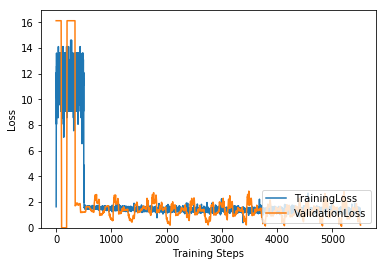

In [28]:
plot_stats(batch_stats_callback.batch_losses, batch_stats_callback.batch_val_losses, stats='loss')

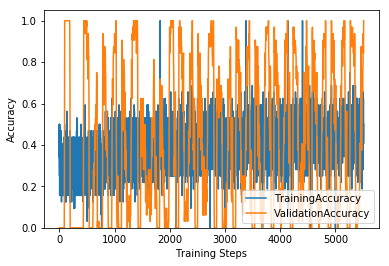

In [29]:
plot_stats(batch_stats_callback.batch_acc, batch_stats_callback.batch_val_acc, stats='accuracy')

In [37]:
ground_truth = validation_generator.classes
filenames = validation_generator.filenames
label_to_index = validation_generator.class_indices
index_to_label = dict((v,k) for k, v in label_to_index.items())
predictions = model.predict_generator(validation_generator, steps=None)

# prediction_table is a dict with index, prediction, ground truth
prediction_table = {}
for index, val in enumerate(predictions):
    # get argmax index
    index_of_highest_probability = np.argmax(val)
    value_of_highest_probability = val[index_of_highest_probability]
    prediction_table[index] = [value_of_highest_probability, 
                               index_of_highest_probability, 
                               ground_truth[index]]
assert len(predictions) == len(ground_truth) == len(prediction_table)

In [38]:
def get_images_with_sorted_probabilities(prediction_table,
                                         get_highest_probability,
                                         label,
                                         number_of_items,
                                         only_false_predictions=False):
    sorted_prediction_table = [(k, prediction_table[k])
                               for k in sorted(prediction_table,
                                               key=prediction_table.get,
                                               reverse=get_highest_probability)
                               ]
    result = []
    for index, key in enumerate(sorted_prediction_table):
        image_index, [probability, predicted_index, gt] = key
        if predicted_index == label:
            if only_false_predictions == True:
                if predicted_index != gt:
                    result.append(
                        [image_index, [probability, predicted_index, gt]])
            else:
                result.append(
                    [image_index, [probability, predicted_index, gt]])
    return result[:number_of_items]

def plot_images(filenames, distances, message):
    images = []
    for filename in filenames:
        images.append(mpimg.imread(filename))
    plt.figure(figsize=(20, 15))
    columns = 5
    for i, image in enumerate(images):
        ax = plt.subplot(len(images) / columns + 1, columns, i + 1)
        ax.set_title("\n\n" + filenames[i].split("/")[-2] + "\n" +
                     "\nProbability: " +
                     str(float("{0:.2f}".format(distances[i]))))
        plt.suptitle(message, fontsize=20, fontweight='bold')
        plt.axis('off')
        plt.imshow(image)
        
def display(sorted_indices, message):
    similar_image_paths = []
    distances = []
    for name, value in sorted_indices:
        [probability, predicted_index, gt] = value
        similar_image_paths.append(DATA_TEST_FOLDER + '/' + filenames[name])
        distances.append(probability)
    plot_images(similar_image_paths, distances, message)

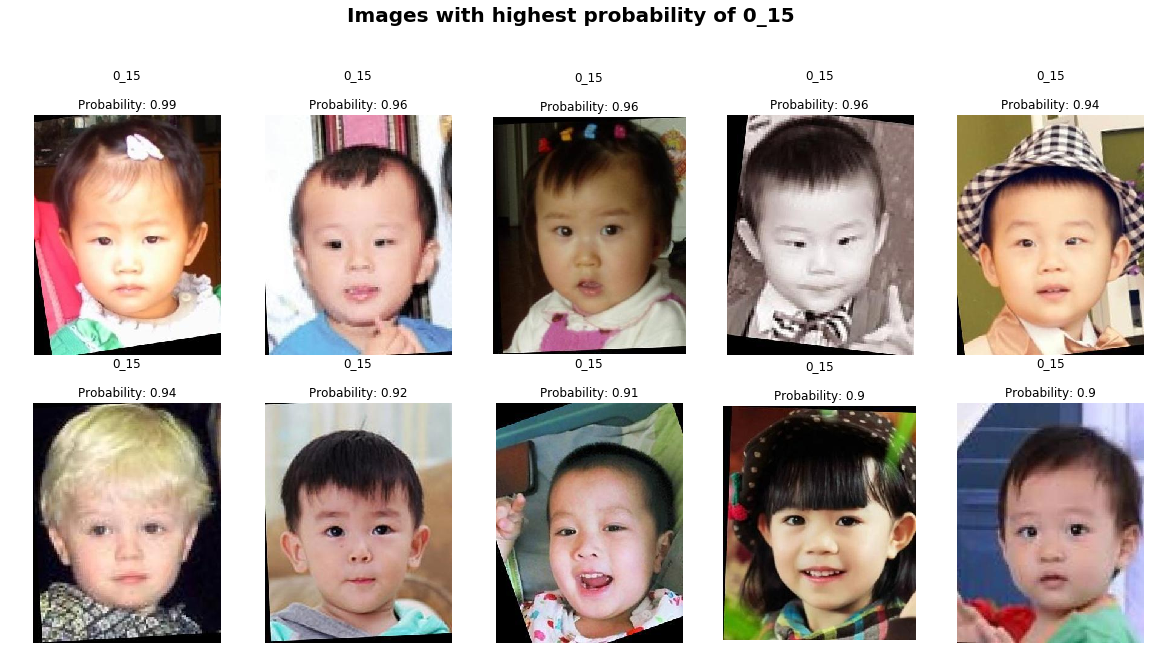

In [44]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

class_index = 0
most_confident_dog_images = get_images_with_sorted_probabilities(prediction_table, True, class_index, 10, False)
message = 'Images with highest probability of ' + index_to_label[class_index]
display(most_confident_dog_images, message)

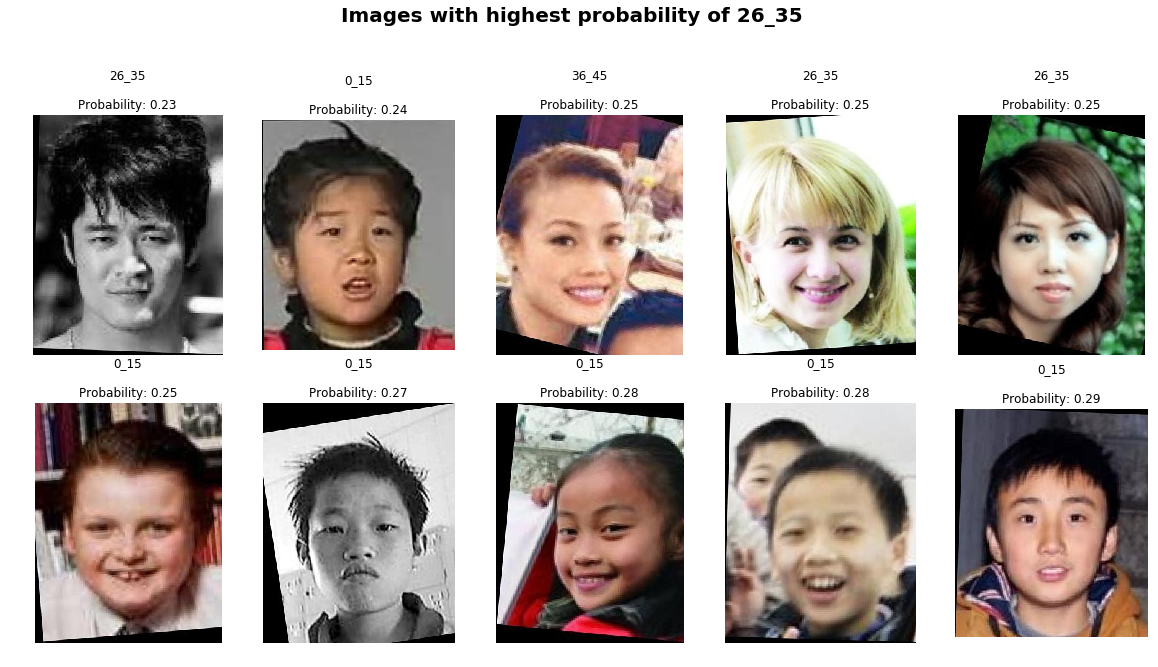

In [46]:
class_index = 2
most_confident_dog_images = get_images_with_sorted_probabilities(prediction_table, False, class_index, 10, False)
message = 'Images with highest probability of ' + index_to_label[class_index]
display(most_confident_dog_images, message)